In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import TruncatedSVD

In [2]:
df=pd.read_csv('sample_data10k.csv',encoding="utf8")
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
df = df.dropna()


'df_sampled = df.sample(frac=0.1, random_state=42)\ndf_sampled.reset_index(drop=True, inplace=True)'

In [3]:
df.head()

,author,subreddit,created_utc,body,comment_length,language
0,TheReasonableCamel,Unexpected,1.391195e+09,\n\n submission remove recent repost . \n\n\n\n,59,en
1,zoinksandjinkies,Random_Acts_Of_Amazon,1.388769e+09,throw rainbow confetti ?,23,en
2,agent_of_entropy,dating_advice,1.390699e+09,"pull subject ass ask question . instance - "" f...",127,en
3,SoCaFroal,HomeImprovement,1.388894e+09,bad luck electronic stud finder . magnetic one...,147,en
4,YouBWrong,AskWomen,1.389628e+09,"exactly . sure disgusting sexy , mean extrem...",94,en


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=5)

X_tfidf = tfidf_vectorizer.fit_transform(df['body'])

In [5]:
X_tfidf.shape

(10000, 3821)

In [ ]:

from sklearn.decomposition import TruncatedSVD
n_components=3200
svd = TruncatedSVD(n_components=n_components)
X_reduced = svd.fit_transform(X_tfidf)
explained_variances = svd.explained_variance_ratio_




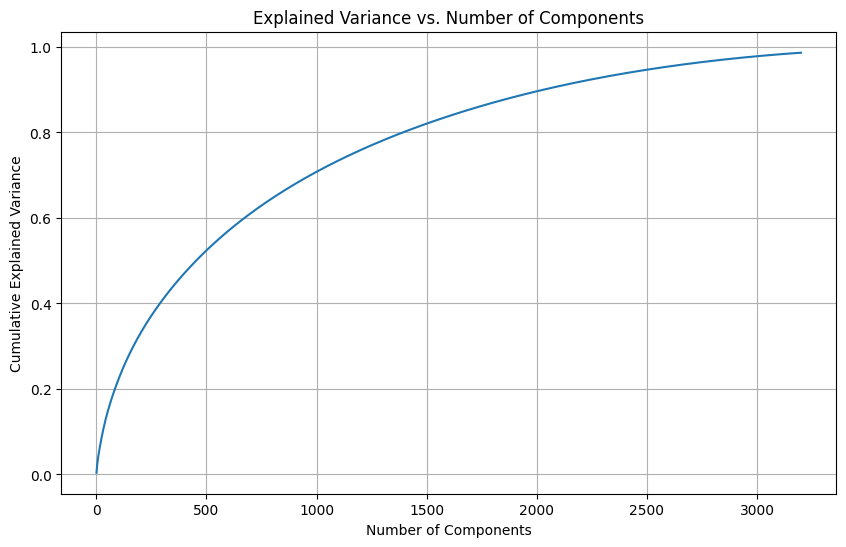

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), explained_variances.cumsum(), marker=None)
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [9]:


n_components = 2100
svd = TruncatedSVD(n_components=n_components)
X_reduced = svd.fit_transform(X_tfidf)
explained_variance = svd.explained_variance_ratio_.sum()
print(f"Cumulative explained variance for {n_components} components: {explained_variance}")


Cumulative explained variance for 2100 components: 0.906728187359604


In [10]:
X_reduced.shape

(10000, 2100)

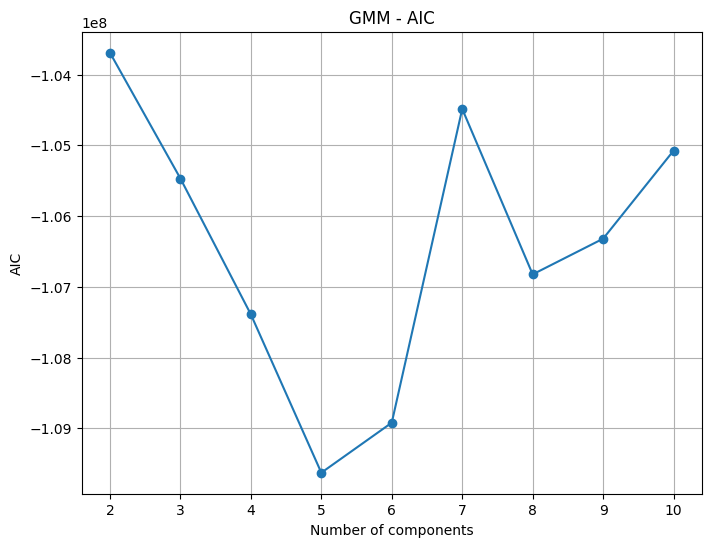

In [14]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

# Number of components to try
n_components = np.arange(2, 11)


aics = []



for k in n_components:
    gmm = GaussianMixture(n_components=k, random_state=123).fit(X_reduced)
    aics.append(gmm.aic(X_reduced))



plt.figure(figsize=(8, 6))

plt.plot(n_components, aics, marker='o')
plt.title('GMM - AIC')
plt.xlabel('Number of components')
plt.ylabel('AIC')
plt.grid(True)

plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
from wordcloud import WordCloud


gmm = GaussianMixture(n_components=5, random_state=123).fit(X_reduced)
cluster_labels = gmm.predict(X_reduced)


df['cluster'] = cluster_labels




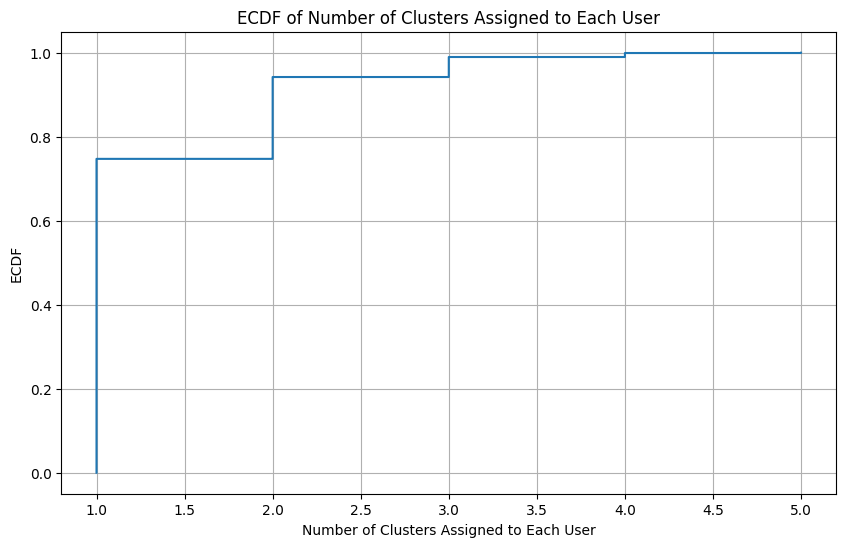

In [19]:
from statsmodels.distributions.empirical_distribution import ECDF
user_cluster_distribution = df.groupby('author')['cluster'].nunique()


ecdf = ECDF(user_cluster_distribution)


plt.figure(figsize=(10, 6))
plt.step(ecdf.x, ecdf.y, where='post')
plt.xlabel('Number of Clusters Assigned to Each User')
plt.ylabel('ECDF')
plt.title('ECDF of Number of Clusters Assigned to Each User')
plt.grid(True)

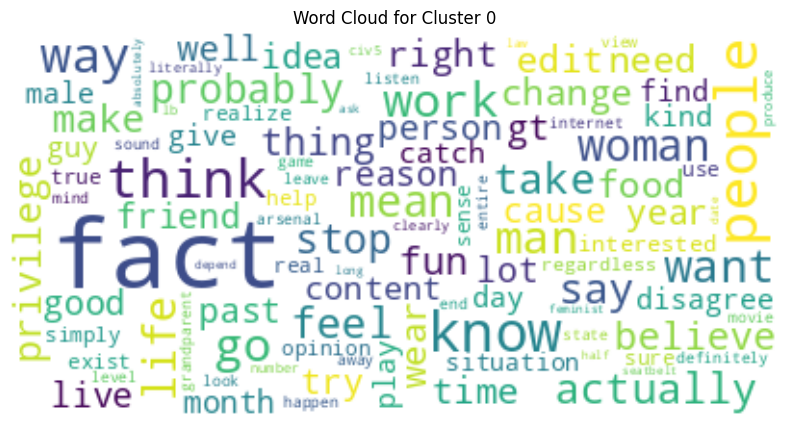

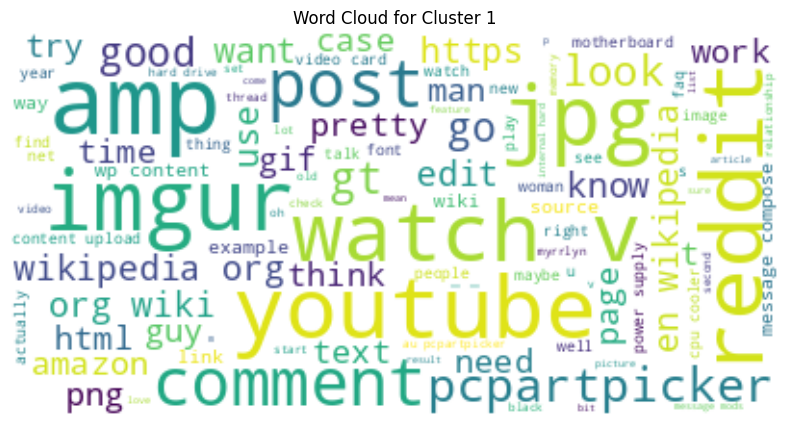

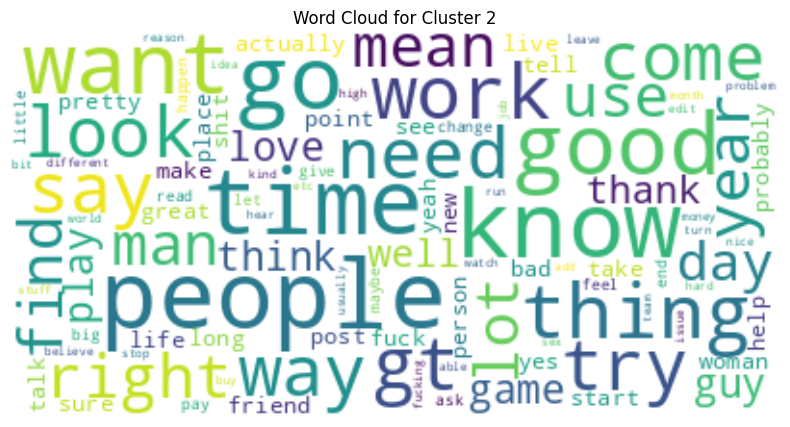

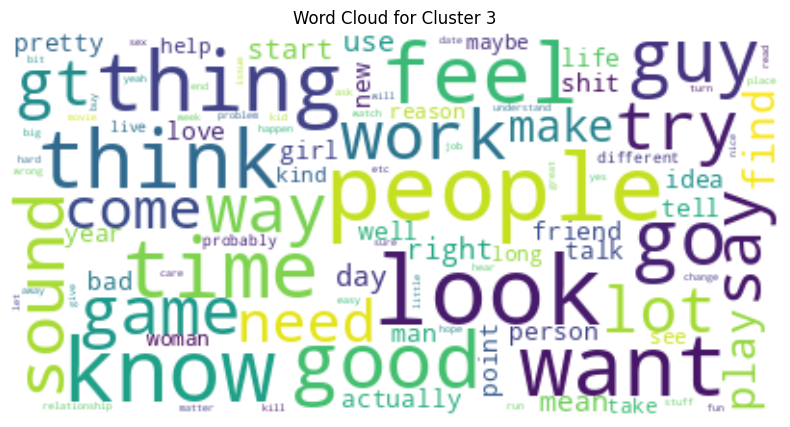

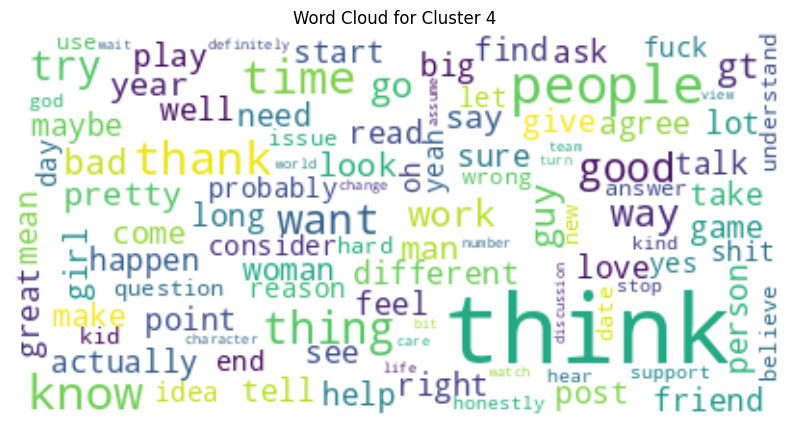

In [20]:

for i in range(5):

    subset = df[df['cluster'] == i]
    text = " ".join(comment for comment in subset['body'])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f'Word Cloud for Cluster {i}')
    plt.show()


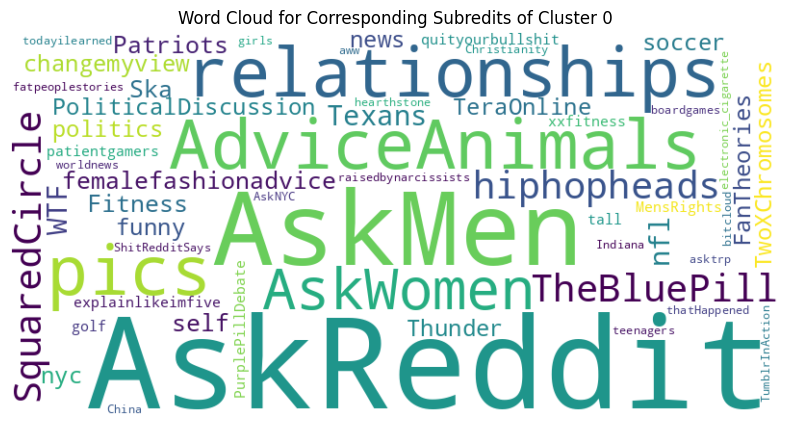

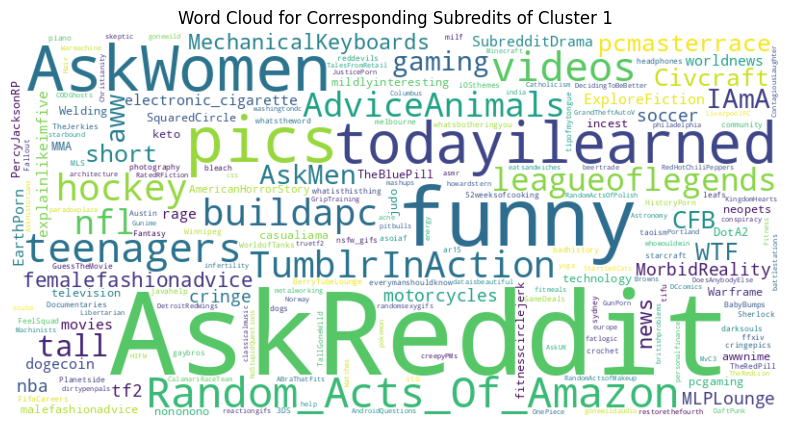

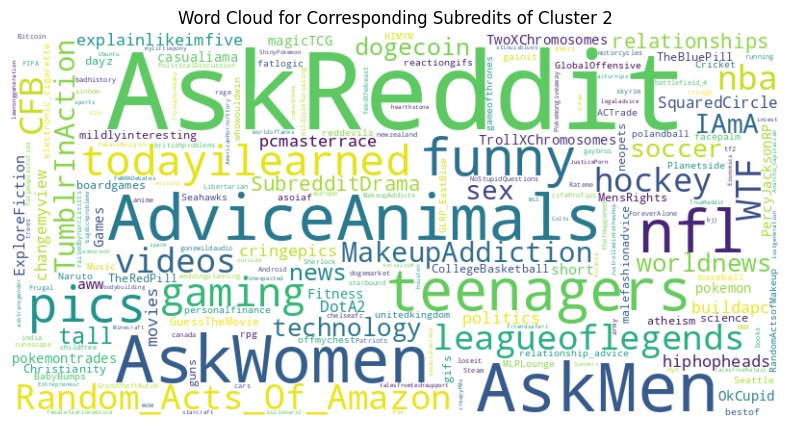

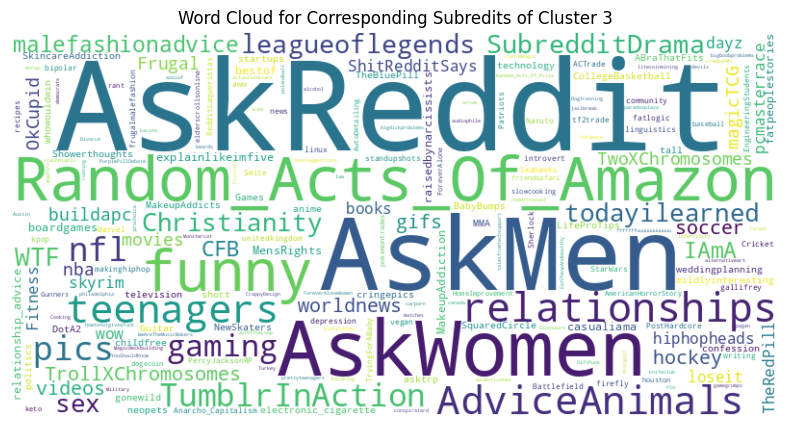

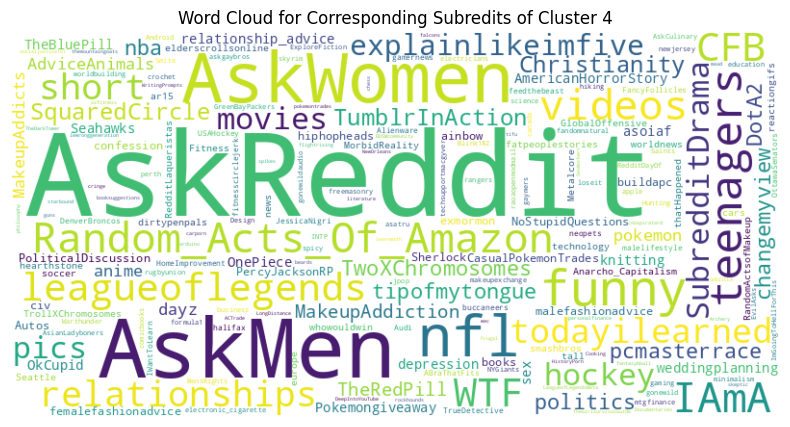

In [21]:
from wordcloud import WordCloud

subreddit_names_by_cluster = {}
for cluster in range(5):
    subreddits_in_cluster = df[df['cluster'] == cluster]['subreddit']
    all_subreddits = ' '.join(subreddits_in_cluster)
    subreddit_names_by_cluster[cluster] = all_subreddits


for cluster, subreddit_names in subreddit_names_by_cluster.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(subreddit_names)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Corresponding Subredits of Cluster {cluster}')
    plt.axis('off')
    plt.show()


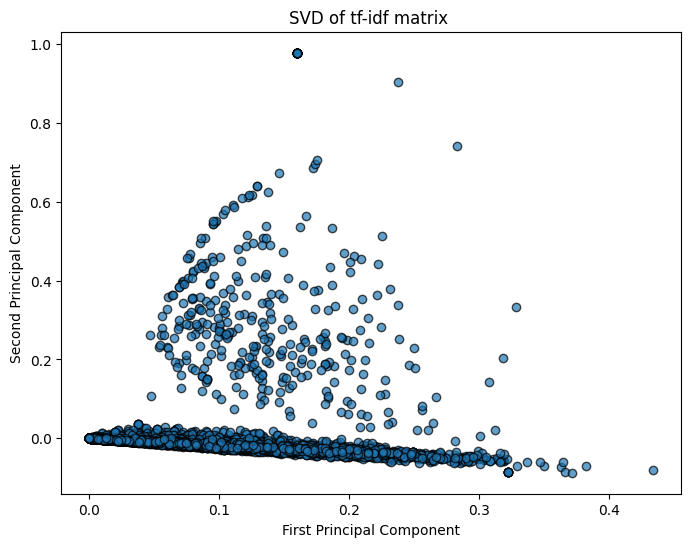

In [ ]:
svd1 = X_reduced[:,0]
svd2 = X_reduced[:,1]


# scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(svd1, svd2, marker='o', alpha=0.7, edgecolor='k')


plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('SVD of tf-idf matrix ')


plt.show()
